In [50]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.constants import e, m_e, h

# Parámetros experimentales
L = 0.135e-3  # en metros

# Pendientes obtenidas de los ajustes
m_1 = 2.5e-4  # en 1/sqrt(V)
sigma_m1 = 0.1e-4
m_2 = 3.8e-4
sigma_m2 = 0.1e-4

# Constante común
sqrt_2em = np.sqrt(2 * e * m_e)

# Estimación de d a partir de la pendiente
d1_estimado = (2 * L * h) / (m_1 * sqrt_2em)
d2_estimado = (2 * L * h) / (m_2 * sqrt_2em)

# Propagación de error para d
sigma_d1 = abs(d1_estimado * (sigma_m1 / m_1))
sigma_d2 = abs(d2_estimado * (sigma_m2 / m_2))

# Valores reales de d para estimar h
d1_real = 213.3e-12  # metros
d2_real = 123.05e-12  # metros

# Estimación de h a partir de pendiente y valor real de d
h1_estimado = (m_1 * d1_real * sqrt_2em) / (2 * L)
h2_estimado = (m_2 * d2_real * sqrt_2em) / (2 * L)

# Propagación de error para h
sigma_h1 = abs(h1_estimado * (sigma_m1 / m_1))
sigma_h2 = abs(h2_estimado * (sigma_m2 / m_2))

# Mostrar resultados
print("Estimación de d₁:", d1_estimado, "+/-", sigma_d1, "m")
print("Estimación de d₂:", d2_estimado, "+/-", sigma_d2, "m")
print("Estimación de h con d₁ real:", h1_estimado, "+/-", sigma_h1, "J·s")
print("Estimación de h con d₂ real:", h2_estimado, "+/-", sigma_h2, "J·s")


Estimación de d₁: 1.3245400434508013e-09 +/- 5.298160173803205e-11 m
Estimación de d₂: 8.714079233228954e-10 +/- 2.293178745586567e-11 m
Estimación de h con d₁ real: 1.067042683974165e-34 +/- 4.26817073589666e-36 J·s
Estimación de h con d₂ real: 9.356558623525173e-35 +/- 2.46225226934873e-36 J·s


In [51]:
h = 4.136667696*1e-15 #eV*s
c = 299798458*1e09 #nm/s
me = 0.51099895*1e06/(c**2) #eV/c**2

data = pd.read_excel("Datos_difraccione.xlsx", sheet_name="Hoja1", engine="openpyxl")
V = data['kV'].to_numpy() * 1000 #V
V_err = 0.1 * 1000 #V
D11 = data['D11'].to_numpy() #cm
D12 = data['D12'].to_numpy() #cm
D21 = data['D21'].to_numpy() #cm
D22 = data['D22'].to_numpy() #cm

L = 13.5 #cm
d1 = 213 #pm
d2 = 123 #pm


In [52]:
D1 = (D12 + D11) / 2
D2 = (D22 + D21) / 2
D1_err =  D12 - D11
D2_err =  D22 - D21
data = np.array([D1, D2, D1_err, D2_err]).T
data = pd.DataFrame(data, columns=["D1", "D2", "D1_err", "D2_err"])
data

,D1,D2,D1_err,D2_err
0,3.7450,6.3200,0.510,0.810
1,3.3950,5.6925,0.210,0.495
2,3.0300,5.1475,0.340,0.595
3,2.7875,4.7600,0.385,0.460
4,2.5775,4.4350,0.335,0.440
5,2.4475,4.2125,0.365,0.335


In [53]:
de_Broglie = (h / np.sqrt(2 * me * V)) * 1000 #pm 
de_Broglie_err = (0.5 * (h / np.sqrt(2 * me * V**3)) * V_err) * 1000 #pm
de_Broglie_ = np.array([de_Broglie, de_Broglie_err]).T
de_Broglie_ = pd.DataFrame(de_Broglie_, columns=["de_Broglie", "de_Broglie_err"])
de_Broglie_

,de_Broglie,de_Broglie_err
0,27.430898,0.685772
1,24.534941,0.490699
2,22.397235,0.373287
3,20.735810,0.296226
4,19.396574,0.242457
5,18.287266,0.203192


In [54]:
Bragg = lambda n,d,D : (2*d/n) * np.sin(0.5 * np.arctan((D/2) / L)) #pm
Bragg_err = lambda n,d,D,D_err : np.abs((2*d/n) * np.cos(0.5 * np.arctan((D/2) / L)) * 0.5 * (1 / (1 - ((D/2) / L)**2)) * (D_err / (2*L)))

bragg_1 = Bragg(1,d1,D1)
bragg_1_err = Bragg_err(1,d1,D1,D1_err)
bragg_2 = Bragg(1,d2,D2)
bragg_2_err = Bragg_err(1,d2,D2,D2_err)
bragg = np.array([bragg_1, bragg_1_err, bragg_2, bragg_2_err]).T
bragg = pd.DataFrame(bragg, columns=["bragg_1", "bragg_1_err", "bragg_2", "bragg_2_err"])
bragg

,bragg_1,bragg_1_err,bragg_2,bragg_2_err
0,29.333354,4.092519,28.219659,3.878126
1,26.625584,1.679990,25.512239,2.347174
2,23.791355,2.712193,23.137405,2.800322
3,21.902983,3.065883,21.436666,2.154548
4,20.264528,2.664064,20.002959,2.053205
5,19.248873,2.900336,19.017810,1.559505


In [55]:
data = np.array([V/1000 , D1, D1_err, D2, D2_err, de_Broglie, de_Broglie_err, bragg_1, bragg_1_err, bragg_2, bragg_2_err]).T
data = pd.DataFrame(data, columns=["V", "D1", "D1_err", "D2", "D2_err", "de_Broglie", "de_Broglie_err", "bragg_1", "bragg_1_err", "bragg_2", "bragg_2_err"])
data

,V,D1,D1_err,D2,D2_err,de_Broglie,de_Broglie_err,bragg_1,bragg_1_err,bragg_2,bragg_2_err
0,2.0,3.7450,0.510,6.3200,0.810,27.430898,0.685772,29.333354,4.092519,28.219659,3.878126
1,2.5,3.3950,0.210,5.6925,0.495,24.534941,0.490699,26.625584,1.679990,25.512239,2.347174
2,3.0,3.0300,0.340,5.1475,0.595,22.397235,0.373287,23.791355,2.712193,23.137405,2.800322
3,3.5,2.7875,0.385,4.7600,0.460,20.735810,0.296226,21.902983,3.065883,21.436666,2.154548
4,4.0,2.5775,0.335,4.4350,0.440,19.396574,0.242457,20.264528,2.664064,20.002959,2.053205
5,4.5,2.4475,0.365,4.2125,0.335,18.287266,0.203192,19.248873,2.900336,19.017810,1.559505


In [56]:
data.to_csv("Actividad_2.csv", index=False)

Vamos a utilizar el siguiente modelo
$$ D=\frac{2L}{d} \frac{h}{\sqrt{2e m_e}} \frac{1}{\sqrt{V}} $$

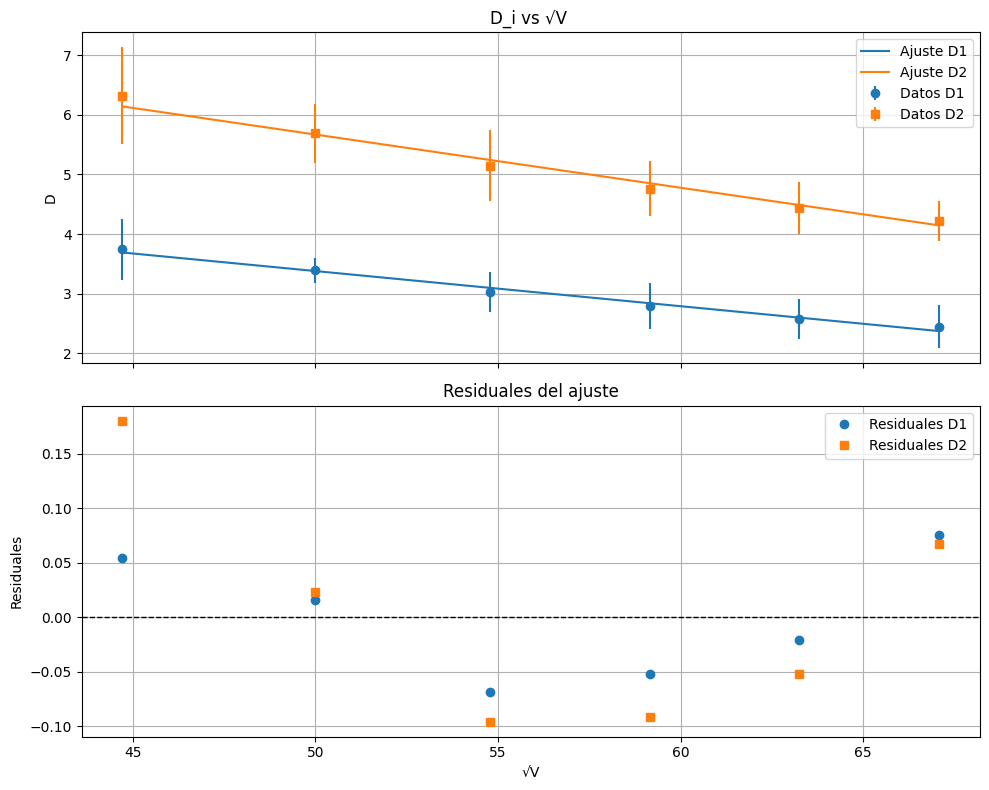

In [57]:
def linear (m,x,b):
    return m*x+b

x=np.sqrt(V) 

params_1,cov_1=curve_fit(linear,x,D1,sigma=D1_err)
params_2,cov_2=curve_fit(linear,x,D2,sigma=D2_err)

m_1,b_1=params_1
sigma_m1, sigma_b1=np.sqrt(np.diag(cov_1))

m_2,b_2=params_2
sigma_m2, sigma_b2=np.sqrt(np.diag(cov_2))

D1_ajustado=linear(m_1,x,b_1)
residuales_1=D1-D1_ajustado
D2_ajustado=linear(m_2,x,b_2)
residuales_2=D2-D2_ajustado

L = 0.135e-3 
sqrt_2em = np.sqrt(2 * e * m_e)

d1_estimado = (2 * L * h) / (m_1 * sqrt_2em)
d2_estimado = (2 * L * h) / (m_2 * sqrt_2em)


sigma_d1 = abs(d1_estimado * (sigma_m1 / m_1))
sigma_d2 = abs(d2_estimado * (sigma_m2 / m_2))

d1_real = 213.3e-12  # metros
d2_real = 123.05e-12  # metros


h1_estimado = (m_1 * d1_real * sqrt_2em) / (2 * L)
h2_estimado = (m_2 * d2_real * sqrt_2em) / (2 * L)


sigma_h1 = abs(h1_estimado * (sigma_m1 / m_1))
sigma_h2 = abs(h2_estimado * (sigma_m2 / m_2))

h_mean=h1_estimado+h2_estimado
sigma_h_mean=1/2*np.sqrt(sigma_h1**2+sigma_h2**2)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Primer gráfico: ajustes
ax1.errorbar(x, D1, yerr=D1_err, fmt='o', label='Datos D1', color='tab:blue')
ax1.plot(x, D1_ajustado, '-', label='Ajuste D1', color='tab:blue')
ax1.errorbar(x, D2, yerr=D2_err, fmt='s', label='Datos D2', color='tab:orange')
ax1.plot(x, D2_ajustado, '-', label='Ajuste D2', color='tab:orange')
ax1.set_ylabel('D')
ax1.set_title('D_i vs √V ')
ax1.legend()
ax1.grid(True)

# Segundo gráfico: residuales
ax2.axhline(0, color='black', linestyle='--', linewidth=1)
ax2.plot(x, residuales_1, 'o', label='Residuales D1', color='tab:blue')
ax2.plot(x, residuales_2, 's', label='Residuales D2', color='tab:orange')
ax2.set_xlabel('√V')
ax2.set_ylabel('Residuales')
ax2.set_title('Residuales del ajuste')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()



